In [22]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries used for Modelling
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing


In [23]:
df =  pd.read_csv('dataset.csv')
df = df[['room_type','bedrooms','price','reviews','overall_satisfaction', 'accommodates', 'latitude', 'longitude']]
df.head()

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,room_type,bedrooms,price,reviews,overall_satisfaction,accommodates,latitude,longitude
0,2,1,50,2,0,1,6249,1238
1,2,1,67,0,0,0,333,7851
2,2,1,62,0,0,1,7728,8104
3,2,1,57,1,0,2,6663,2558
4,2,1,65,1,0,1,1892,4875


In [24]:
# To convert NaN values to 0 for preparation for Modelling
newdf = df.fillna(0)
# Checking to ensure that there are no NULL entries
newdf.isnull().sum()

room_type               0
bedrooms                0
price                   0
reviews                 0
overall_satisfaction    0
accommodates            0
latitude                0
longitude               0
dtype: int64

In [25]:
# Separating X and y for Modelling
X = pd.DataFrame(df[["bedrooms", "room_type",'reviews', 'overall_satisfaction','accommodates']]) #Predictor Variable
y = pd.DataFrame(df["price"]) #Response Variable

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

C:\Users\Sherin Saju\AppData\Local\Temp\ipykernel_18992\3469011015.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,


In [28]:
# calculating the weight of the features.
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
overall_satisfaction,0.020847
accommodates,0.054104
reviews,0.073770
room_type,0.121973
bedrooms,0.729306


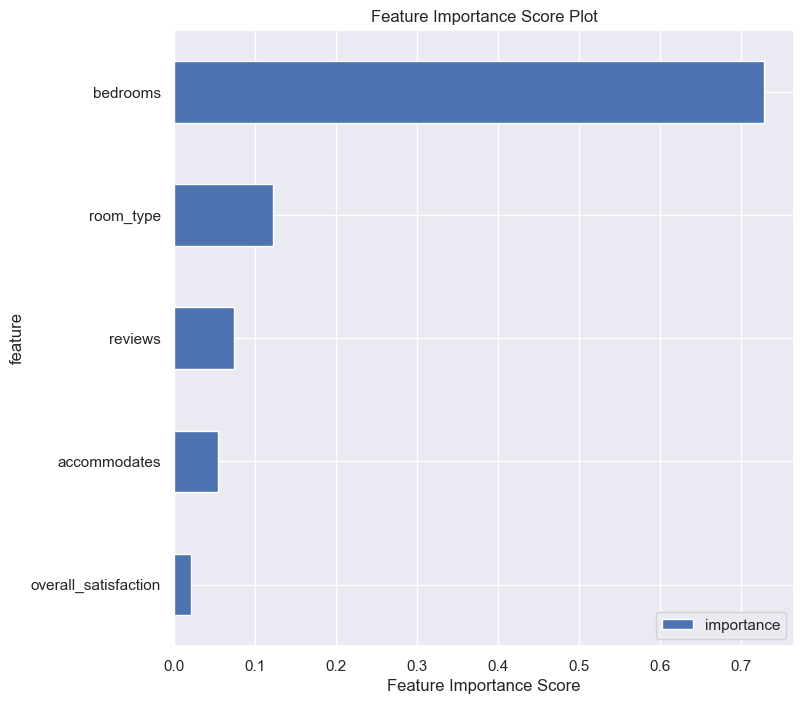

In [29]:
# plotting importance of features  
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance Score Plot')
plt.savefig("Randomforest_variableplot")
plt.show()

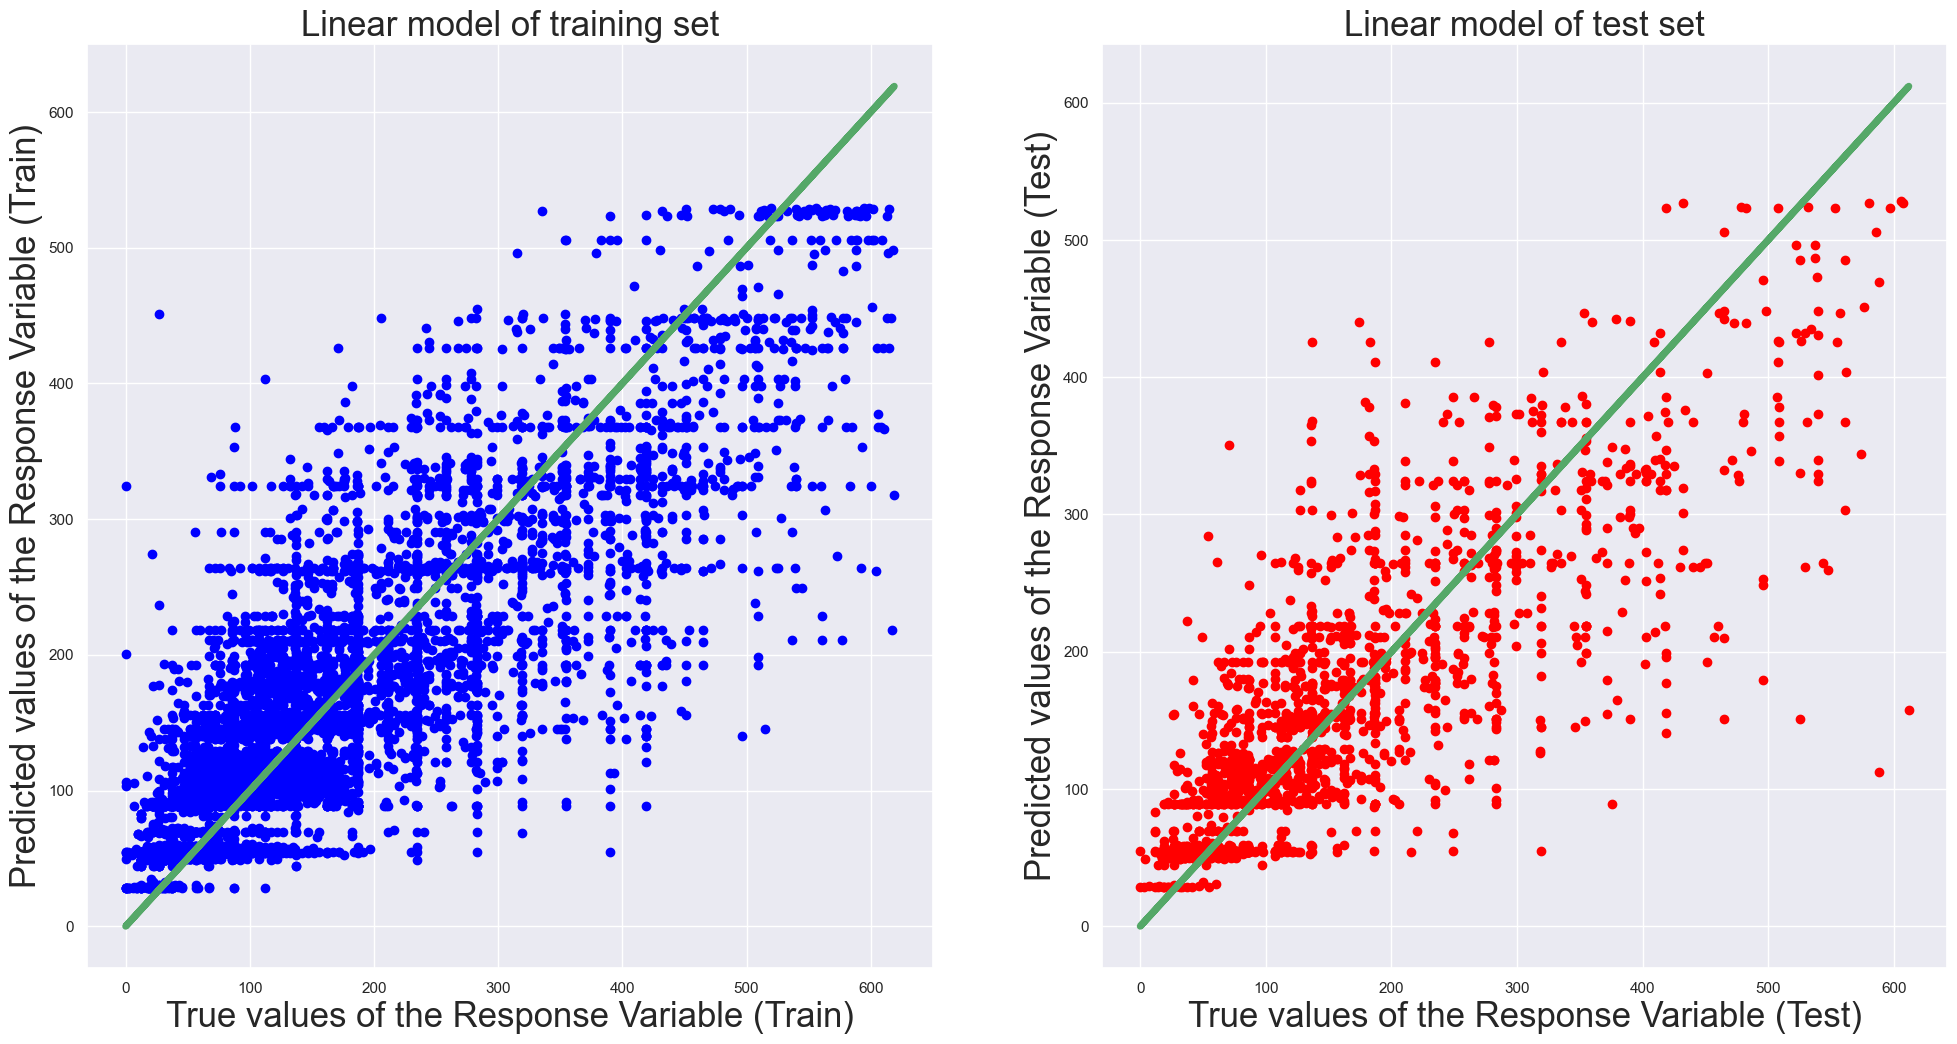

In [34]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)", fontsize=25)
axes[0].set_ylabel("Predicted values of the Response Variable (Train)", fontsize=25)
axes[0].set_title("Linear model of training set", fontsize=25)
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)", fontsize=25)
axes[1].set_ylabel("Predicted values of the Response Variable (Test)", fontsize=25)
axes[1].set_title("Linear model of test set", fontsize=25)
plt.savefig("Randomforest_ML.png")


In [1]:
# getting r square value. 
from sklearn.metrics import r2_score

print("The R square value of the model : ", r2_score(y_test, testPredictin_RF))

NameError: name 'y_test' is not defined